
* After you make predictions, you need to know if they are any good
* There are standard measures that we can use to summarize how good a set of predictions actually is.
* This is important as it allows you to tell the diference and select:
    * Diferent transforms of the data used to train the same machine learning model
    * Diferent machine learning models trained on the same data
    * Diferent configurations for a machine learning model trained on the same data.

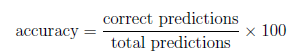

In [1]:
#Classification Accuracy
from math import sqrt
from IPython.display import Image
Image(filename='clasification_accuracy.PNG')
#Accuracy is a good metric to use when you have a small number of class values, such as 2, 
#also called a binary classification problem.

In [2]:
# Calculate accuracy percentage between two lists
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

In [3]:
# Test accuracy
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]
accuracy = accuracy_metric(actual, predicted)
print(accuracy)

80.0


In [4]:
import pandas as pd
import numpy as np
dataset = pd.read_csv("bitcoin.csv",index_col=0)
dataset_copy=dataset.copy(deep=True)
for feature in dataset.columns:
    dataset_copy[feature]=dataset_copy[feature].apply(lambda row:float(row))
def func(row):
    if row.Close > row.Open:
        return 1
    else :
        return -1
dataset_copy['trend'] = dataset_copy.apply(lambda row: func(row),axis=1 )
y=dataset_copy['trend']
len(y)

1694

In [5]:
import numpy as np
from sklearn.metrics import accuracy_score
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,0,0,0,1,0,1,1,1]
#percentage
accuracy_score(actual, predicted)
#absoluto
accuracy_score(actual, predicted, normalize=False)

8

* Confusion Matrix
    * provides a summary of all of the predictions made compared to the expected actual values
    * The counts of actual class values are summarized horizontally, whereas the counts of predictions for each class values are presented vertically.
    * The value of a confusion matrix for classication problems is that you can clearly see which
predictions were wrong and the type of mistake that was made.

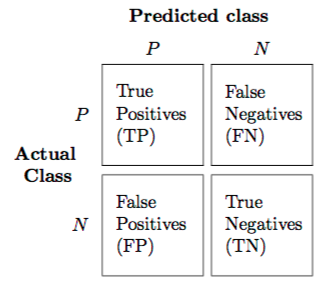

In [6]:
import itertools
from IPython.display import Image
Image(filename='Confusion_Matrix.png')

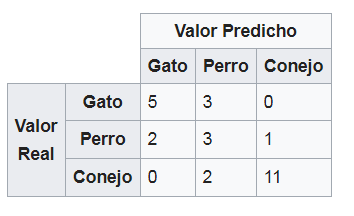

In [7]:
from IPython.display import Image
Image(filename='ejemplo_matriz.PNG')

In [8]:
import matplotlib.pyplot as plt
# calculate a confusion matrix
def confusion_matrix_own(actual, predicted):
    unique = set(actual)
    matrix = [list() for x in range(len(unique))]
    for i in range(len(unique)):
        matrix[i] = [0 for x in range(len(unique))]
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
    for i in range(len(actual)):
        x = lookup[actual[i]]
        y = lookup[predicted[i]]
        matrix[x][y] += 1
    return unique, matrix
# Test confusion matrix with integers
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,1,0,0,1,0,1,1,1]
unique, matrix = confusion_matrix_own(actual, predicted)
#print(unique)
#print(matrix)
#pretty print a confusion matrix
def plot_confusion_matrix1(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = np.round((cm.astype('float') / cm.sum(axis=1)[:, np.newaxis])*100,0)
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('real')
    plt.xlabel('predicted')
def print_confusion_matrix(unique, matrix):
    print('(P)' + ' '.join(str(x) for x in unique))
    print('(A)---')
    for i, x in enumerate(unique):
        print("%s| %s" % (x, ' '.join(str(x) for x in matrix[i])))
print_confusion_matrix(unique, matrix)

(P)0 1
(A)---
0| 3 2
1| 1 4


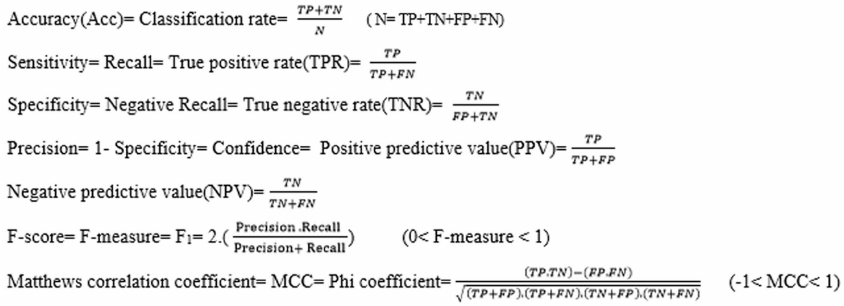

In [9]:
from IPython.display import Image
Image(filename='formulas.png')

In [10]:
#Calculate Accuracy, precision, F, Recall???

Confusion matrix, without normalization
[[3 2]
 [1 4]]


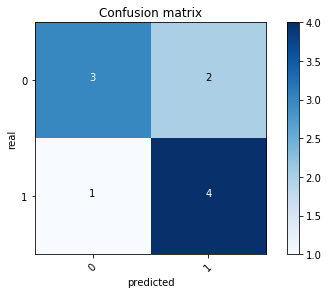

In [11]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
actual = [0,0,0,0,0,1,1,1,1,1]
predicted = [0,1,1,0,0,1,0,1,1,1]
m=confusion_matrix(actual, predicted)
plot_confusion_matrix1(m,classes=('0','1'))


Normalized confusion matrix
[[60. 40.]
 [20. 80.]]


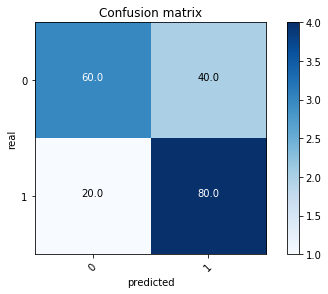

In [12]:
plot_confusion_matrix1(m,classes=('0','1'),normalize=True)

In [13]:
from sklearn.metrics import classification_report
report = classification_report(actual, predicted)
print(report)

             precision    recall  f1-score   support

          0       0.75      0.60      0.67         5
          1       0.67      0.80      0.73         5

avg / total       0.71      0.70      0.70        10



**Mean Absolute Error (error medio absoluto)**

Regression problems are those where a real value is predicted. An easy metric to consider is the
error in the predicted values as compared to the expected values.

In [14]:
# Calculate mean absolute error
def mae_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        sum_error += abs(predicted[i] - actual[i])
    return sum_error / float(len(actual))

In [15]:
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]
mae = mae_metric(actual, predicted)
print(mae)

0.007999999999999993


In [16]:
from sklearn.metrics import mean_absolute_error
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]
mae=mean_absolute_error(actual, predicted)
print(mae)

0.007999999999999993


**Root Mean Squared Error**

Squaring each error forces the values to be positive

the square root of the mean squared error returns the error metric back to the original units for comparison.

In [17]:
#Calculate root mean squared error
def rmse_metric(actual, predicted):
    sum_error = 0.0
    for i in range(len(actual)):
        prediction_error = predicted[i] - actual[i]
        sum_error += (prediction_error ** 2)
    mean_error = sum_error / float(len(actual))
    return sqrt(mean_error)

In [18]:
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]
rmse = rmse_metric(actual, predicted)
print(rmse)

0.00894427190999915


The result is slightly higher at 0.0089.

RMSE values are always slightly higher than MSE values, which becomes more pronounced as
the prediction errors increase. 

This is a benefit of using RMSE over MSE in that it penalizes
larger errors with worse scores.

In [19]:
from sklearn.metrics import mean_squared_error
actual = [0.1, 0.2, 0.3, 0.4, 0.5]
predicted = [0.11, 0.19, 0.29, 0.41, 0.5]
rmse = mean_squared_error(actual, predicted)
print(rmse)

7.999999999999986e-05
